<a href="https://colab.research.google.com/github/dzeaulfath/Python/blob/main/Random%20Forest%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!wget -O konsumen.csv https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv

--2021-10-24 14:08:34--  https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340501 (5.1M) [text/plain]
Saving to: ‘konsumen.csv’

konsumen.csv        100%[===================>]   5.09M  --.-KB/s    in 0.08s   

2021-10-24 14:08:35 (61.5 MB/s) - ‘konsumen.csv’ saved [5340501/5340501]



In [ ]:
#Menampilkan data
df = pd.read_csv('konsumen.csv', delimiter=';', skiprows=0, low_memory=False)
df.head()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


# DATA PREPARATION

In [ ]:
df = df.drop(columns=['BESAR DP', 'BESAR CICILAN', 'LAMA CICILAN', 'KETERANGAN','SALES DATE', 'TANGGAL LAHIR'])

In [ ]:
df.isna().sum()

TYPE MOTOR                0
COLOR                     0
KODE CUSTOMER             0
JENIS KELAMIN             0
KECAMATAN SURAT           0
KOTA SURAT                0
PROPINSI                  0
STATUS RUMAH              0
JENIS PENJUALAN STNK      0
JENIS PENJUALAN SSU       0
AGAMA                     0
PEKERJAAN                 0
PENGELUARAN               0
PENDIDIKAN                0
KEBERSEDIAAN DIHUBUNGI    0
MERK MOTOR SBLMNYA        0
TYPE MOTOR SBLMNYA        0
SMH DIGUNAKAN UNTUK       0
YG MENGGUNAKAN SMH        0
HOBI                      0
KEWARGANEGARAAN           6
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

TYPE MOTOR                0
COLOR                     0
KODE CUSTOMER             0
JENIS KELAMIN             0
KECAMATAN SURAT           0
KOTA SURAT                0
PROPINSI                  0
STATUS RUMAH              0
JENIS PENJUALAN STNK      0
JENIS PENJUALAN SSU       0
AGAMA                     0
PEKERJAAN                 0
PENGELUARAN               0
PENDIDIKAN                0
KEBERSEDIAAN DIHUBUNGI    0
MERK MOTOR SBLMNYA        0
TYPE MOTOR SBLMNYA        0
SMH DIGUNAKAN UNTUK       0
YG MENGGUNAKAN SMH        0
HOBI                      0
KEWARGANEGARAAN           0
dtype: int64

In [ ]:
#Mengencode Data Kategorikal

list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KEWARGANEGARAAN
0,30,5,0,0,10,0,0,1,0,0,2,0,4,0,1,1,0,1,3,0,0
1,30,5,0,0,4,0,0,1,0,0,2,8,5,4,1,1,3,1,3,0,0
2,30,5,0,0,3,0,0,0,0,0,2,4,2,4,1,1,3,1,3,0,0
3,30,5,0,0,11,0,0,1,1,1,2,8,2,4,1,1,0,5,3,20,0
4,30,5,0,0,12,0,0,1,0,0,2,4,2,4,1,1,3,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,15,5,0,1,18,0,0,1,0,0,2,9,4,4,1,0,1,1,3,34,0
18612,14,5,0,0,7,0,0,2,1,0,2,8,2,4,1,5,0,4,2,25,0
18613,14,11,0,0,1,0,0,0,0,0,2,8,6,4,1,1,2,1,3,0,0
18614,31,2,0,0,8,0,0,0,1,0,2,8,4,0,1,1,0,1,3,20,0


In [ ]:
df['SMH DIGUNAKAN UNTUK'].value_counts()

1    8443
5    6365
3    2422
2     660
4     532
0     154
6      34
Name: SMH DIGUNAKAN UNTUK, dtype: int64

* BERDAGANG                8443

---



* PEMAKAIAN JARAK DEKAT    6365

---



* KEBUTUHAN KELUARGA       2422

---



* KE SEKOLAH/ KE KAMPUS     660

---



* LAIN-LAIN                 532

---



* BEKERJA                   154

---



* REKREASI/ OLAH RAGA        34

In [ ]:
df['PEKERJAAN'].value_counts()

8     5819
4     3399
2     2655
9     1057
22     987
17     862
14     756
15     563
20     491
10     430
1      337
7      307
18     246
13     228
16     149
12     100
19      71
11      68
21      30
0       29
6       14
3       11
5        1
Name: PEKERJAAN, dtype: int64

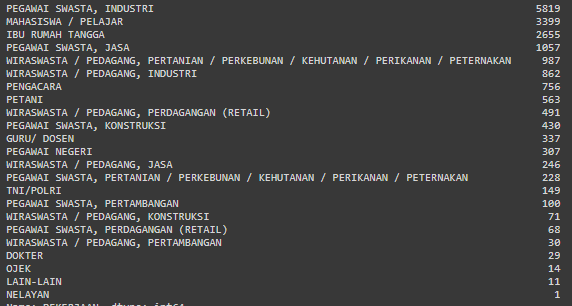

In [ ]:
df['HOBI'].value_counts()

0     4068
20    2908
24    2887
23    2518
25    1224
48     486
11     457
22     425
18     404
14     397
26     356
21     336
27     259
44     191
4      180
28     164
33     129
2      113
42      97
50      90
53      78
40      77
37      73
5       62
35      62
47      50
36      46
7       45
30      42
29      41
54      29
31      29
16      29
46      29
3       29
13      27
6       27
41      21
34      17
32      15
8       11
15      11
55      10
51       9
38       9
39       8
43       7
10       5
49       4
17       4
19       3
9        3
1        3
52       2
12       2
45       2
Name: HOBI, dtype: int64

In [ ]:
df['TYPE MOTOR'].value_counts()

3     5028
35    2167
33    1911
6     1649
34    1528
27    1380
7     1211
8     1069
26     514
9      476
18     390
19     317
1      150
12     149
22     143
21     134
16      76
0       46
13      46
4       36
30      35
10      26
29      25
24      23
25      15
20      14
32      13
11       7
15       6
14       6
23       6
2        4
28       3
17       3
31       3
5        1
Name: TYPE MOTOR, dtype: int64

**SPLITTING DATA**

In [ ]:
y = df[['TYPE MOTOR']]
X = df[['SMH DIGUNAKAN UNTUK','HOBI', 'PEKERJAAN']] 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# PREDICT THE VALUE

In [ ]:
print("Enter value:")
MOTOR = float(input("AKAN DIGUNAKAN UNTUK : "))
HOBI = float(input("HOBI : "))
PEKERJAAN = float(input("PEKERJAAN : "))
output = clf.predict([[MOTOR, HOBI, PEKERJAAN]])

print(f'\n Motor yang cocok untuk anda adalah {output}')


Enter value:
AKAN DIGUNAKAN UNTUK : 1
HOBI : 1
PEKERJAAN : 1
Motor yang cocok untuk anda adalah [3]
